In [2]:
import os
import glob
import subprocess
import numpy as np
import tifffile as tiff

from thermal_parser import Thermal
from tqdm import tqdm

In [4]:
thermal = Thermal(dtype=np.float32)
emissivity = 1.0

#raw_img_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404210937_006_Pleystocen-IR'
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404211121_009_Pleystocen-IRb"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221002_011_Pleystocen-IR3"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221041_013_Pleystocen-IR4"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221218_016_Pleystocen-IR3b"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404230843_017_Pleystocen-IR5"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404231239_024_Pleystocen-IR3"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_day_IR3\DJI_202408121043_198_Pleystocen-IR3"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_day_IR3b\DJI_202408121108_199_Pleystocen-IR3b"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_evening_IR3\DJI_202408121409_202_Pleystocen-IR3"
#raw_img_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_evening_IR3\DJI_202408121409_202_Pleystocen-IR3"
raw_img_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_evening_IR3b\DJI_202408121549_203_Pleystocen-IR3b"

exiftool_path = 'exiftool.exe'


out_dir = raw_img_dir + '/tiffs_thermal_parser, emis = %.2f/'%emissivity
if not os.path.isdir (out_dir):
    os.mkdir (out_dir)

# def process_file (src_path):
    
#     fname = os.path.basename(str(src_path))
#     dest_path = out_dir + fname.replace('.JPG', '.tiff').replace('.jpg', '.tiff')
#     if os.path.isfile(dest_path):
#         return 'not ok'
    
#     img_data = thermal.parse_dirp2 (src_path, emissivity=emissivity)
#     tiff.imwrite(dest_path, img_data, photometric='minisblack')

#     cmd = '%s -tagsfromfile "%s" "%s"'%(exiftool_path, src_path, dest_path)
#     subprocess.run(cmd, check=True, shell=True)
#     os.remove(dest_path + '_original')
#     return 'ok'

#list(tqdm (map (process_file, glob.glob(raw_img_dir + '\*.jpg'))))

for src_path in tqdm (glob.glob(raw_img_dir + '\*.jpg')):
    fname = os.path.basename(str(src_path))
    dest_path = out_dir + fname.replace('.JPG', '.tiff').replace('.jpg', '.tiff')
    if os.path.isfile(dest_path):
        continue
    img_data = thermal.parse_dirp2 (src_path, emissivity=emissivity)
    tiff.imwrite(dest_path, img_data, photometric='minisblack')

    cmd = '%s -tagsfromfile "%s" "%s"'%(exiftool_path, src_path, dest_path)
    subprocess.run(cmd, check=True, shell=True)
    os.remove(dest_path + '_original')




<>:41: SyntaxWarning: invalid escape sequence '\*'
<>:41: SyntaxWarning: invalid escape sequence '\*'
C:\Users\mvar9\AppData\Local\Temp\ipykernel_440\3339221019.py:41: SyntaxWarning: invalid escape sequence '\*'
  for src_path in tqdm (glob.glob(raw_img_dir + '\*.jpg')):
100%|██████████| 527/527 [07:58<00:00,  1.10it/s]


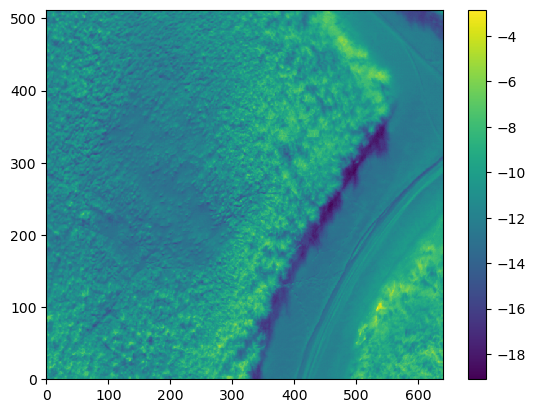

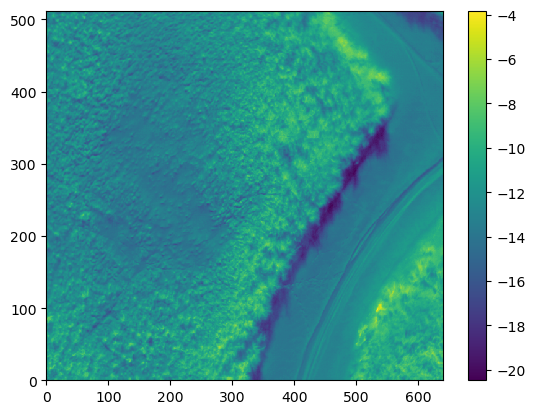

In [6]:
from matplotlib import pyplot as plt

test1 = tiff.imread(r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404210937_006_Pleystocen-IR\tiffs_thermal_parser, emis = 1.00\DJI_20240421094234_0001_T_mod_mod.tiff")
test2 = tiff.imread(r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404210937_006_Pleystocen-IR\DJI_20240421094234_0001_T.tiff")

plt.figure()
plt.pcolormesh (test1)
plt.colorbar()

plt.figure()
plt.pcolormesh (test2)
plt.colorbar()
